In [1]:
import pandas as pd
from random import choice
import math

In [2]:
di_nuc_energy = {
    'CC': -0.36, 'CG': -0.16, 'CT': -0.1, 'CA': -0.06, 
    'GC': 0.97, 'GG': 0.34, 'GT': 0.45, 'GA': 0.38, 
    'TC': -0.12, 'TG': -0.16, 'TT': 0.6, 'TA': -0.12, 
    'AC': 0.45, 'AG': 0.5, 'AT': 0.28, 'AA': 0.8
}

In [3]:
choice(['A', 'T', 'G', 'C'])

'T'

In [35]:
def random_dna(length):
    nucs = ['A', 'T', 'G', 'C']
    seq = ''.join([choice(nucs) for _ in range(length)])
    return seq

r = random_dna(50)

In [5]:
def calculate_continuous_ranges(length):
    for start in range(length):
        for end in range(start + 1, length + 1):
            yield start, end

In [53]:
di_nuc_energy = {
    'CC': -0.36, 'CG': -0.16, 'CT': -0.1, 'CA': -0.06, 
    'GC': 0.97, 'GG': 0.34, 'GT': 0.45, 'GA': 0.38, 
    'TC': -0.12, 'TG': -0.16, 'TT': 0.6, 'TA': -0.12, 
    'AC': 0.45, 'AG': 0.5, 'AT': 0.28, 'AA': 0.8
}

In [28]:
def linear_energy(seq, a):
    free_energy = 0
    for i in range(len(seq)-1):
        dinuc = seq[i] + seq[i+1]
        free_energy += di_nuc_energy[dinuc]
    return a + free_energy

In [54]:
def calculate_continuous_ranges(length):
    for start in range(length):
        for end in range(start + 1, length + 1):
            yield start, end

In [41]:
def run_energy_calcs(sequence, a):
    structures = []
    for start, stop in calculate_continuous_ranges(len(sequence)):
        energy = linear_energy(sequence[start:stop], a)
        structures.append((start, stop, energy))

    return structures

In [47]:
def determine_average_energy(energy_calcs):
    return sum([calc[-1] for calc in energy_calcs]) / len(energy_calcs)



In [58]:
energy = []

for i in range(0, 100):
    energy.append(
        {
            'average_energy': determine_average_energy(run_energy_calcs(r, i)),
            'a': i
        }
    )
energy_df = pd.DataFrame(energy)

In [8]:
%load_ext rpy2.ipython 

In [9]:
%%R

library(ggplot2)
library(ggpubr)

In [10]:
df = pd.read_csv(
    '/home/ethollem/workflows/rlooper-runs/workflow/output/agg_probs/aggregated.rlooper.probs.all.runs.tsv',
    sep='\t'
)

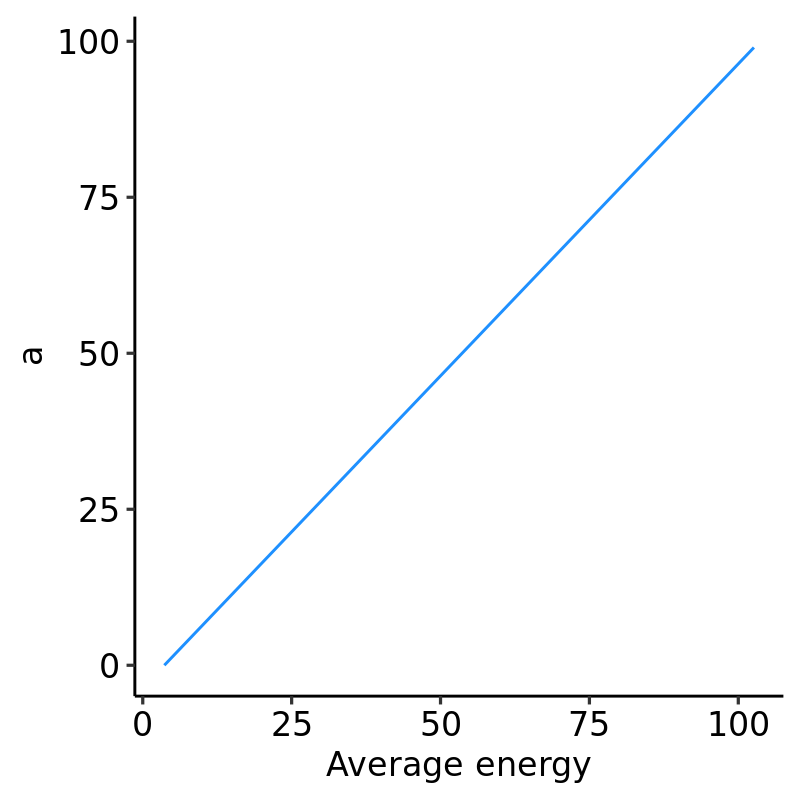

In [77]:
%%R -i energy_df -w 4 -h 4 --units in -r 200

ggplot(energy_df, aes(x=average_energy, y=a)) + geom_line(color='dodgerblue') + theme_pubr() + labs(x='Average energy', y='a')

## Average probability across a sequence for different A values plots

Subset dataframe where supercoiling values == `-0.07`

In [11]:
df_a = df.loc[df.sigma == -0.07]
df_a_short = df_a.iloc[0:int(len(df_a)/50)]

In [12]:
df_a

,rloop_prob,position,plasmid,orrientation,sigma,N,a
0,1.161300e-08,0,pFC9-T7-SNRPN,fwd,-0.07,auto,0.000
1,2.187500e-08,1,pFC9-T7-SNRPN,fwd,-0.07,auto,0.000
2,2.739860e-08,2,pFC9-T7-SNRPN,fwd,-0.07,auto,0.000
3,3.309020e-08,3,pFC9-T7-SNRPN,fwd,-0.07,auto,0.000
4,3.596400e-08,4,pFC9-T7-SNRPN,fwd,-0.07,auto,0.000
...,...,...,...,...,...,...,...
2275931,1.606720e-03,3583,pfc8_genbank_full_coding_gene_start,rc,-0.07,auto,10.885
2275932,1.313630e-03,3584,pfc8_genbank_full_coding_gene_start,rc,-0.07,auto,10.885
2275933,8.981020e-04,3585,pfc8_genbank_full_coding_gene_start,rc,-0.07,auto,10.885
2275934,5.600840e-04,3586,pfc8_genbank_full_coding_gene_start,rc,-0.07,auto,10.885


In [19]:
%%R

a.mod.plot <- function(df){


    plt <- ggplot(df, aes(x=as.factor(a), y=rloop_prob, fill=orrientation)) +
           geom_bar(position = "dodge", stat = "summary", fun = mean) +
           facet_wrap(~plasmid) + theme_pubr() + scale_fill_manual(values=c('#57b593', '#7d57b5')) +
           labs(y='Mean R-loop probability', x='A value') +
           theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))

    plt
}

sigma.mod.plot <- function(df){


    plt <- ggplot(df, aes(x=sigma, y=rloop_prob, fill=orrientation)) +
           geom_bar(position = "dodge", stat = "summary", fun = mean) +
           facet_wrap(~plasmid) + theme_pubr() + scale_fill_manual(values=c('#57b593', '#7d57b5')) +
           labs(y='Sum R-loop probability', x='sigma value') +
           theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))

    plt
}

Isolate out a modulation that is fine grain

In [24]:
df_a_fine = df_a.loc[(df_a.a >= 9.8) & (df.a <= 10.9)]
df_a_fine = df_a_fine.loc[df_a_fine.sigma == -0.07]

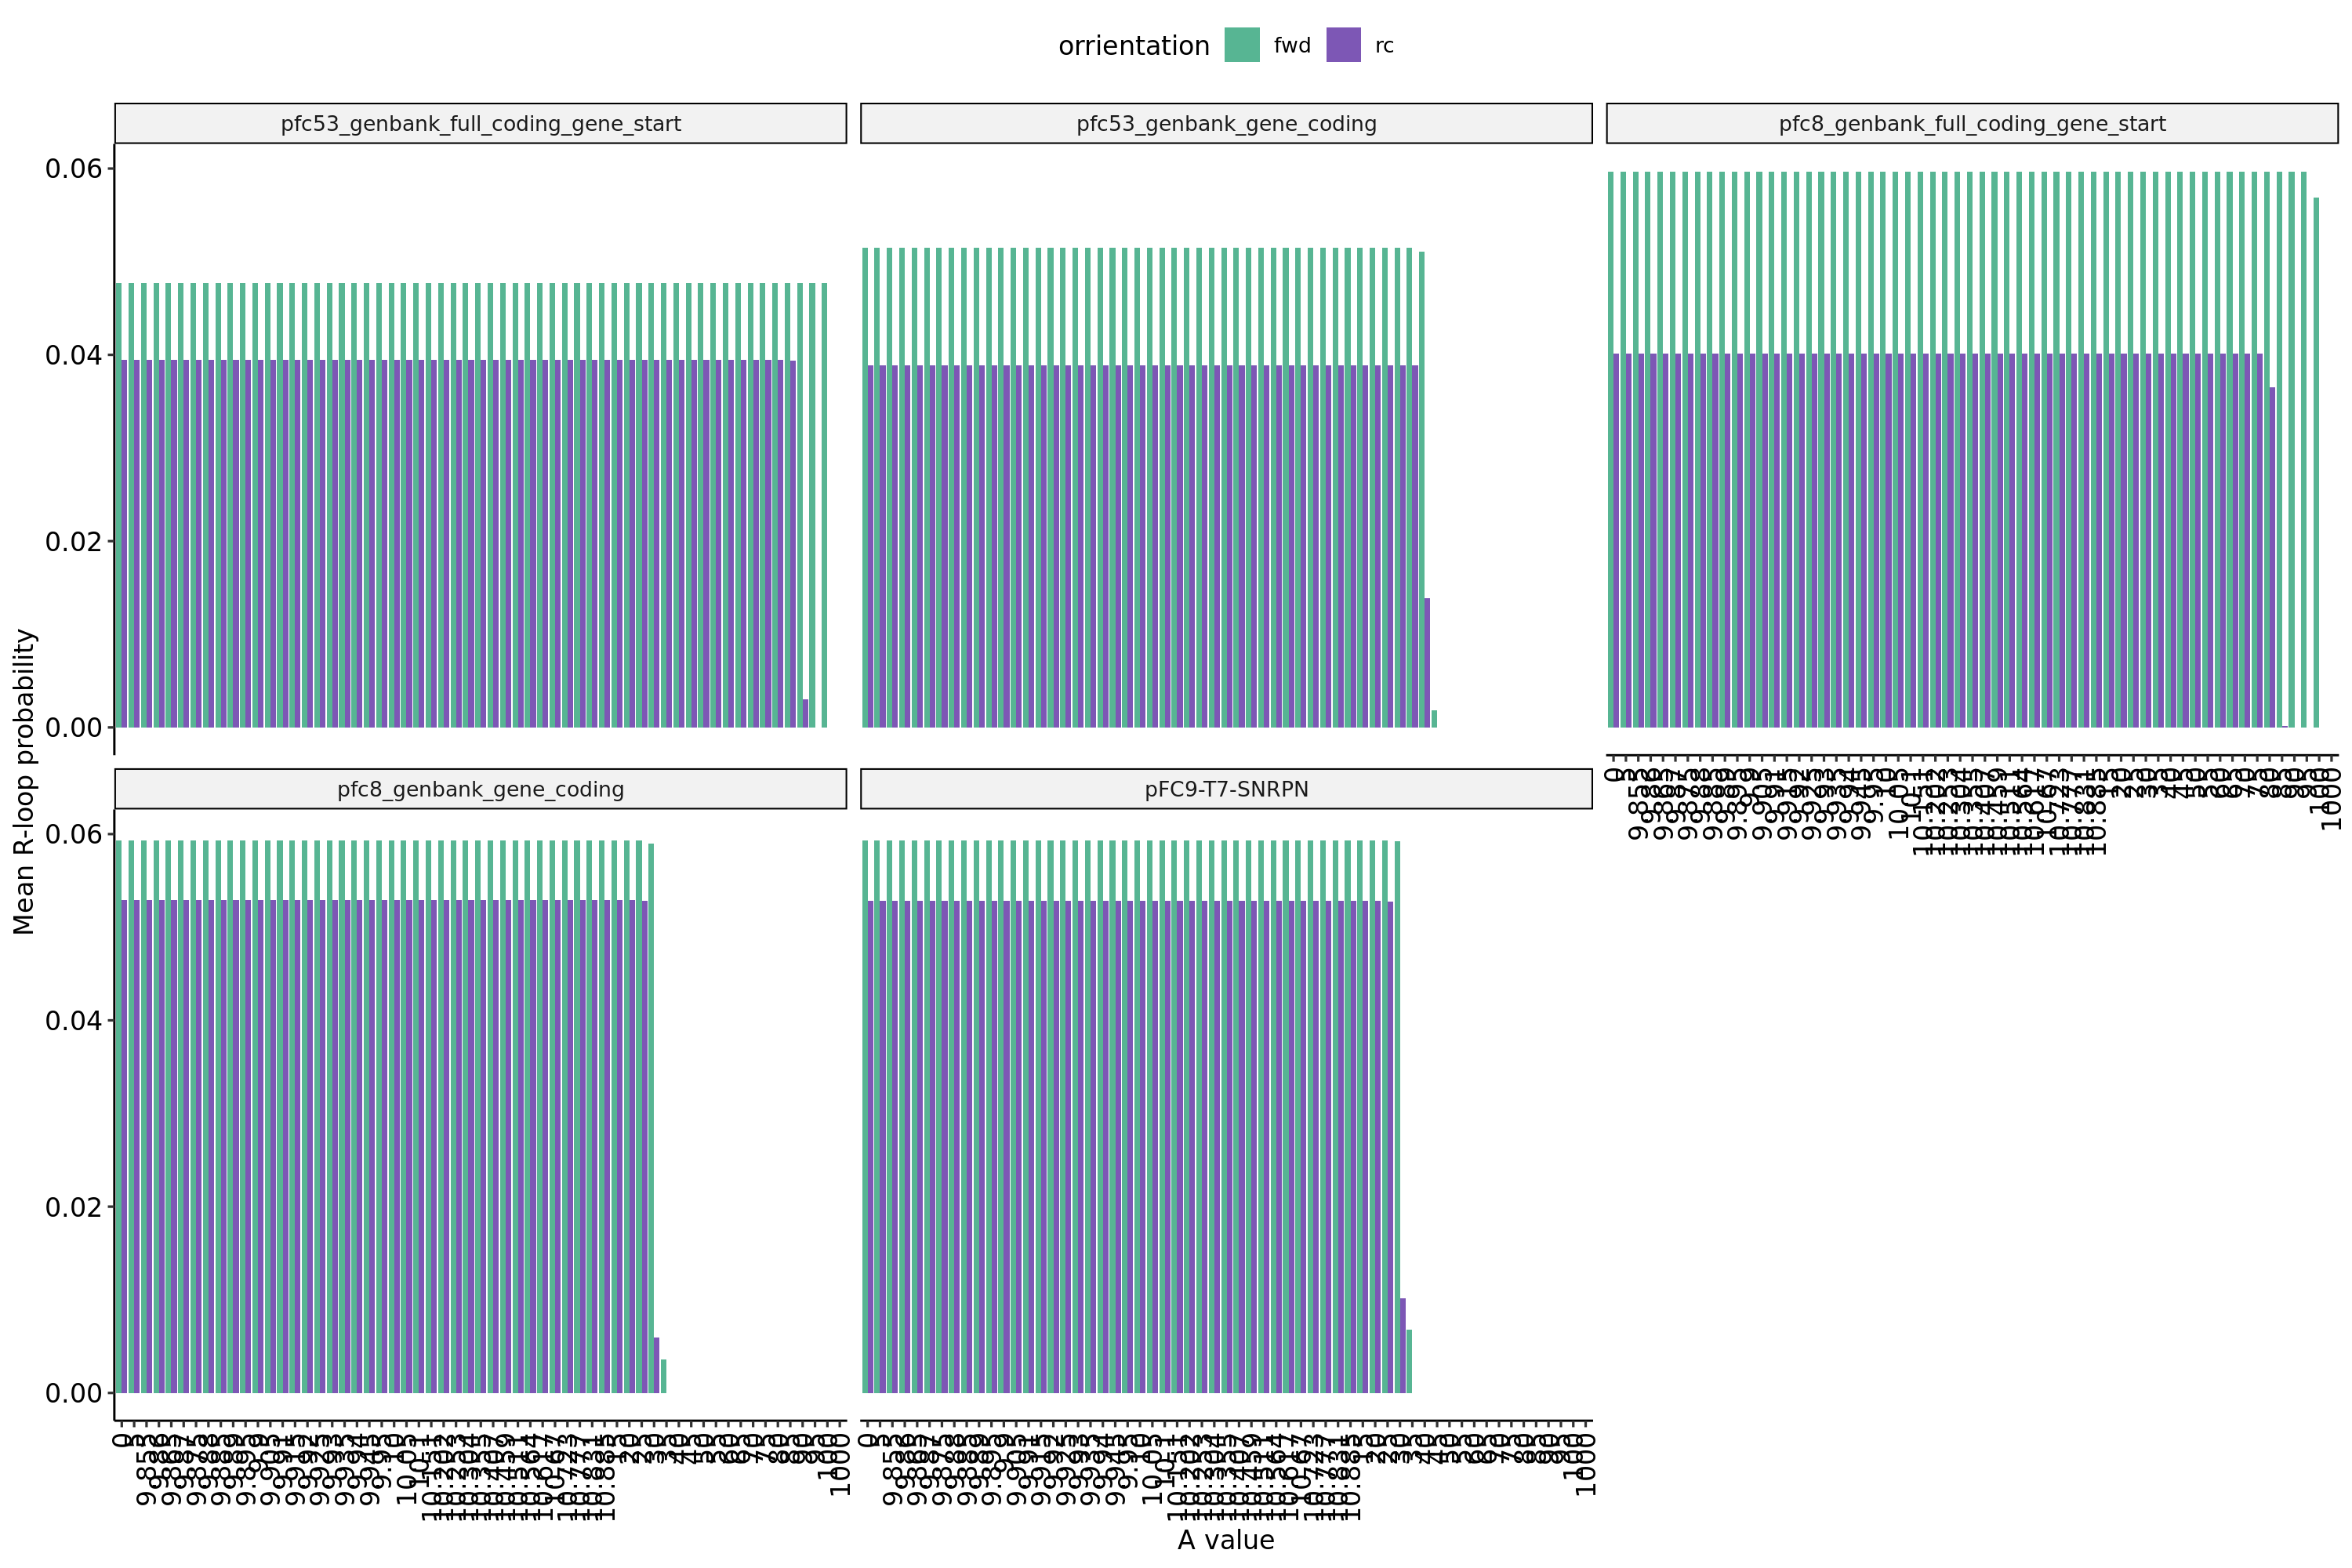

In [14]:
%%R -i df_a -w 15 -h 10 --units in -r 200

a.mod.plot(df_a)

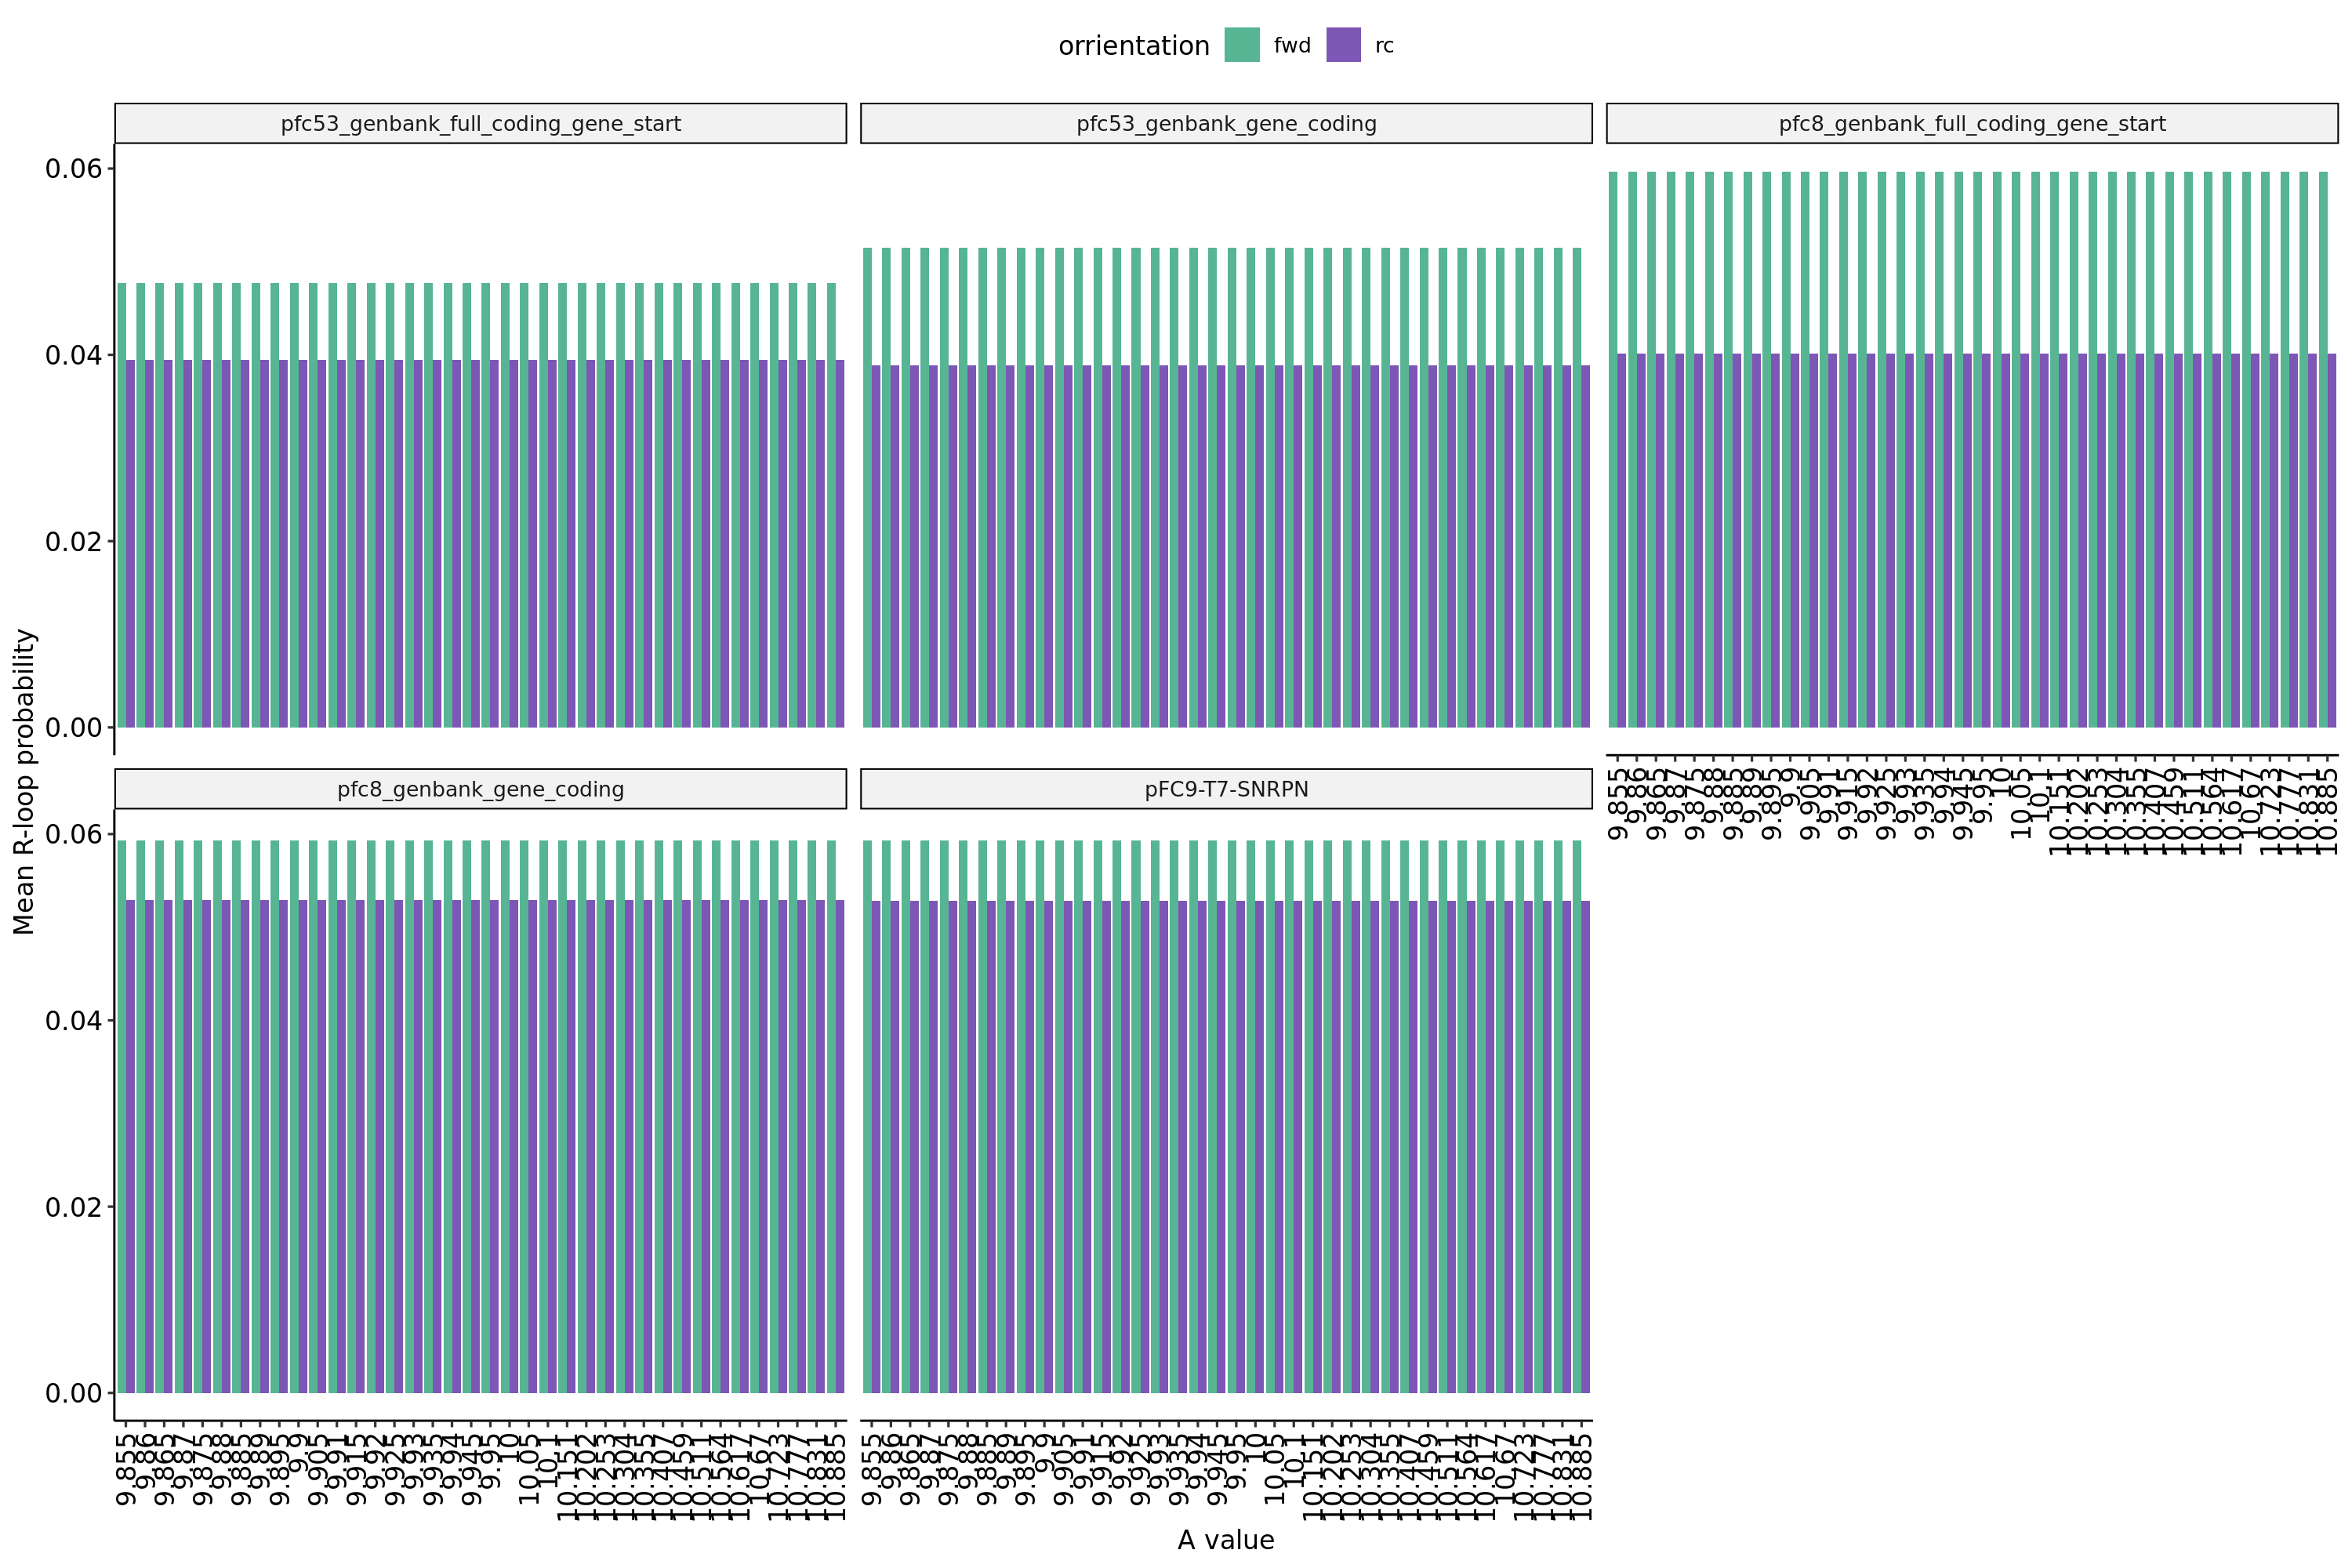

In [26]:
%%R -i df_a_fine -w 15 -h 10 --units in -r 200

a.mod.plot(df_a_fine)

## Probability calculations for sigma modulation while keeping A constant

In [15]:
df_sigma = df.loc[df.a == 10]
df_sigma_pFC9 = df.loc[df.plasmid == 'pFC9-T7-SNRPN']

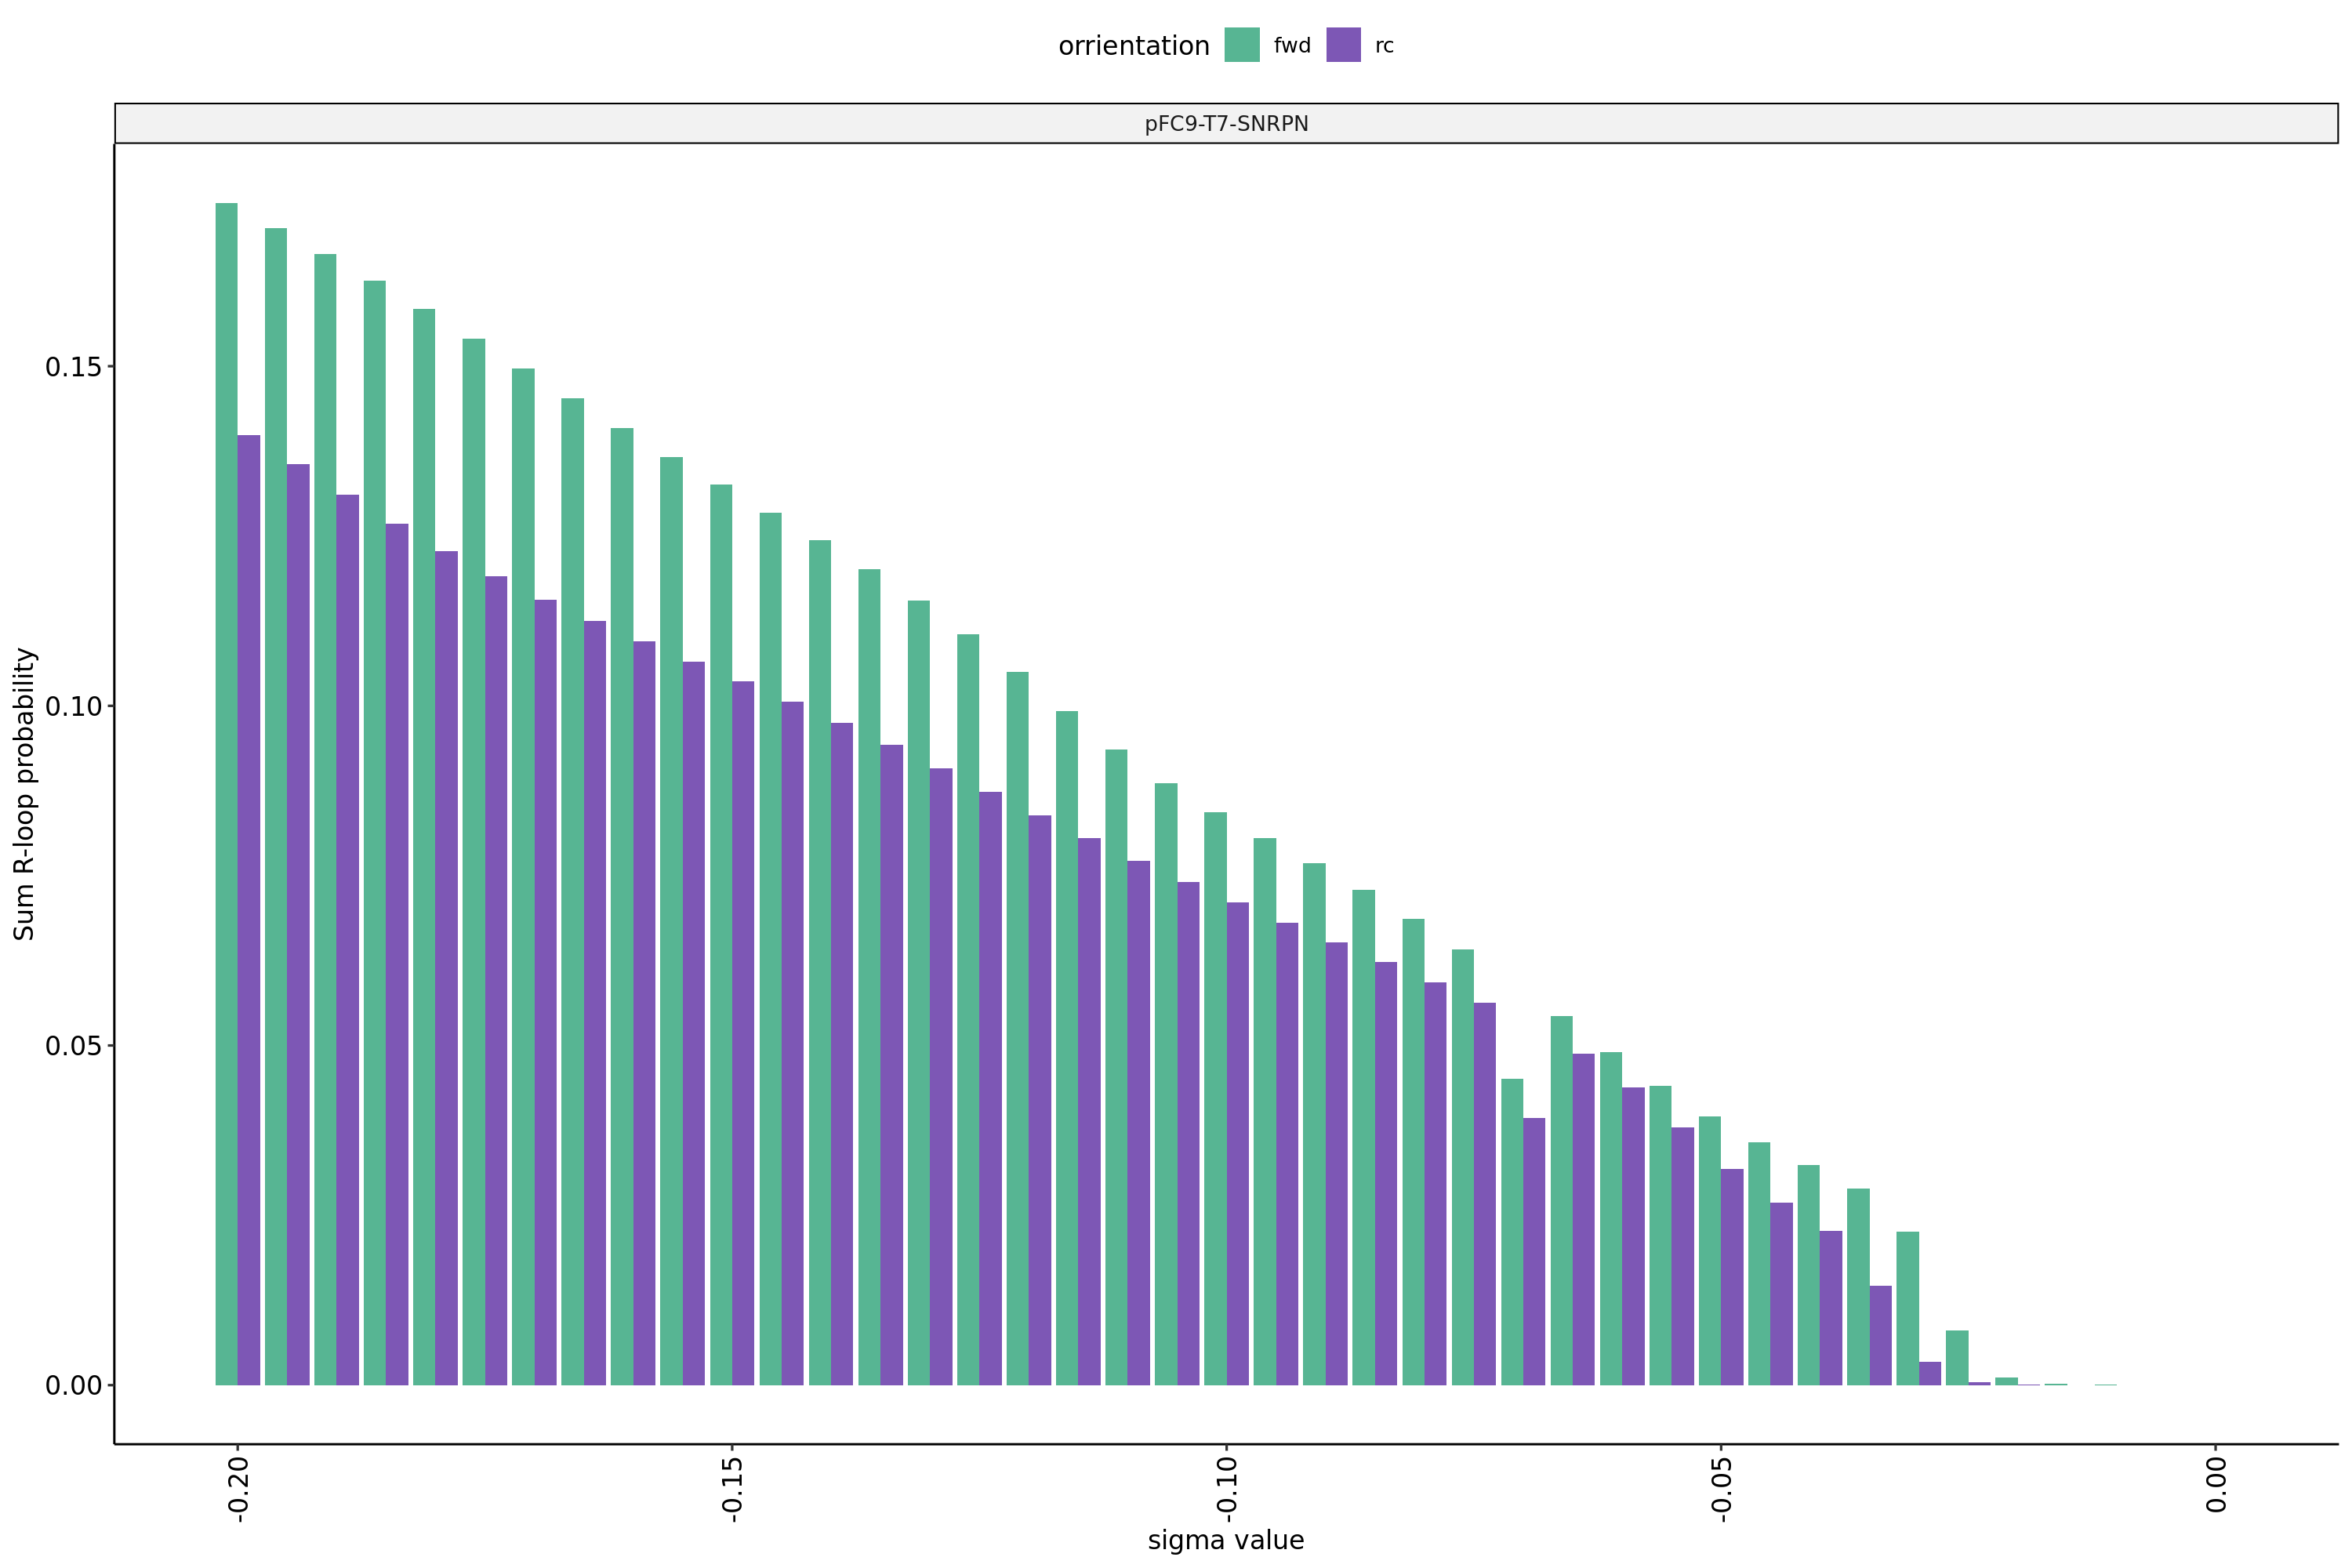

In [20]:
%%R -i df_sigma_pFC9 -w 15 -h 10 --units in -r 200

sigma.mod.plot(df_sigma_pFC9)